# The Demo of $S^2$Generator for Series-Symbol Data Generation

Time series data serves as the external manifestation of complex dynamical systems. This method aims to generate diverse complex systems represented by symbolic expressions $f(\cdot)$ — through unconstrained construction. It simultaneously generates excitation time series $X \in \mathbb{R} ^ {M \times L}$, which are then fed into the complex systems to produce their responses $Y=f(X) \in \mathbb{R} ^ {N \times L}$. Here, $M$, $N$ and $L$ denote the number of input channels, output channels, and series length, respectively.

In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("..")) 
# Importing data generators, parameter controllers and visualization functions
from S2Generator import Generator, Params, plot_series, print_hello

print_hello()

Hello, S2Generator!
This is a Python package for generating time series data with symbolic representations.
For more information, please visit: https://github.com/wwhenxuan/S2Generator

   _____   ___     _____                                        _                  
  / ____| |__ \   / ____|                                      | |                 
 | (___      ) | | |  __    ___   _ __     ___   _ __    __ _  | |_    ___    _ __ 
  \___ \    / /  | | |_ |  / _ \ | '_ \   / _ \ | '__|  / _` | | __|  / _ \  | '__|
  ____) |  / /_  | |__| | |  __/ | | | | |  __/ | |    | (_| | | |_  | (_) | | |   
 |_____/  |____|  \_____|  \___| |_| |_|  \___| |_|     \__,_|  \__|  \___/  |_|                                   



(256, 1)
(73.5 add (cos((-7.57 add (3.89 mul x_0))) mul (((-0.092 mul exp((-63.4 add (-0.204 mul x_0)))) add (-6.12 mul log((-0.847 add (9.55 mul x_0))))) sub ((4.49 mul inv((-29.3 add (-86.2 mul x_0)))) add (-2.57 mul sqrt((51.3 add (-55.6 mul x_0))))))))


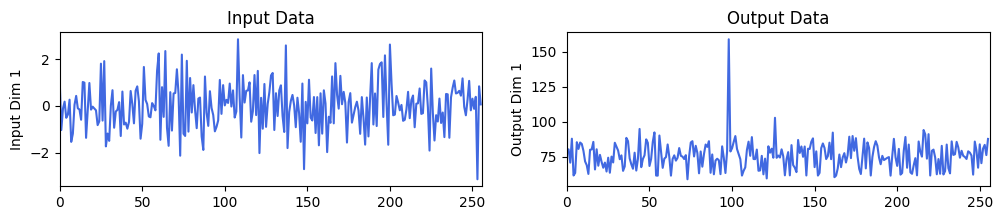

In [17]:
params = Params()  # Adjust the parameters here
generator = Generator(params)  # Create an instance

rng = np.random.RandomState(0)  # Creating a random number object
# Start generating symbolic expressions, sampling and generating series

trees, x, y = generator.run(rng, input_dimension=1, output_dimension=1, n_points=256)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(256, 1)
(73.5 add (cos((-7.57 add (3.89 mul x_0))) mul (((-0.092 mul exp((-63.4 add (-0.204 mul x_0)))) add (-6.12 mul log((-0.847 add (9.55 mul x_0))))) sub ((4.49 mul inv((-29.3 add (-86.2 mul x_0)))) add (-2.57 mul sqrt((51.3 add (-55.6 mul x_0))))))))


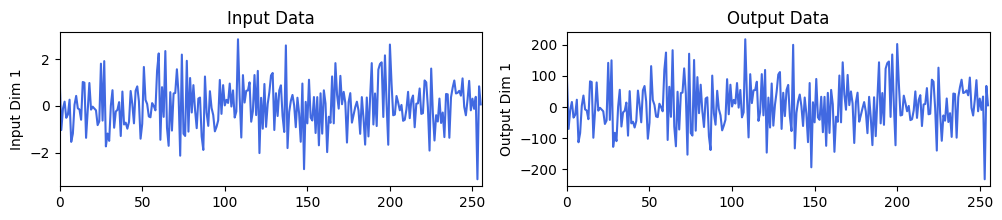

In [20]:
params = Params()  # Adjust the parameters here
params.solve_diff = 1  # Set the order of differential equation solving
generator = Generator(params)  # Create an instance

rng = np.random.RandomState(0)  # Creating a random number object
# Start generating symbolic expressions, sampling and generating series

trees, x, y = generator.run(rng, input_dimension=1, output_dimension=1, n_points=256)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(256, 1)
(9.08 add ((-0.659 mul x_0) add (3.94 mul (x_0 mul x_1)))) | (55.9 add ((-0.227 mul sqrt(((-58.9 mul x_1) add (1.03 mul tan(((7.8 mul sqrt((-0.376 add (20.4 mul x_1)))) sub (-9.24 mul ((0.079 add (-6.84 mul x_1)))**2))))))) sub (-0.006 mul sqrt((-95.7 add (87.1 mul x_0))))))


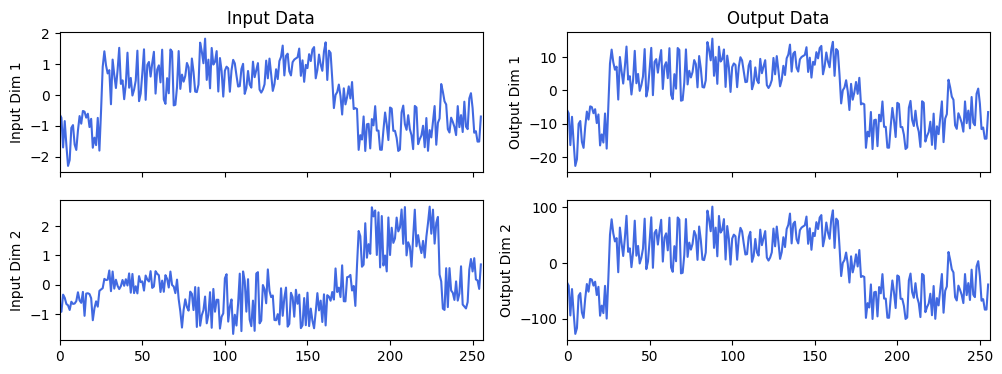

In [6]:
rng = np.random.RandomState(18)  # Change the random seed
params.solve_diff = 1  # Set the order of differential equation solving
# Try to generate the multi-channels time series
trees, x, y = generator.run(rng, input_dimension=2, output_dimension=2, n_points=256)
print(trees)
fig = plot_series(x, y)

In [6]:
fig.savefig("../images/ID2_OD2.jpg", dpi=300, bbox_inches="tight")

(256, 1)
(256, 1)
(0.016 add (((0.489 mul x_0) add (-2.94 mul ((((-8.7 mul (((-0.518 mul x_2) add (-0.238 mul exp((-7.51 add (-57.1 mul x_0))))))**3) add (-32.0 mul sqrt((0.379 add (-0.376 mul x_0))))) add (5.86 mul sqrt((0.6 add (49.4 mul x_2))))) mul x_0))) sub (0.067 mul x_1))) | (0.988 add (((2.3 mul x_0) sub (((-57.2 mul x_0) sub (-8.77 mul x_0)) add ((76.4 mul inv((-4.71 add (79.3 mul x_2)))) sub (-2.34 mul sqrt((65.7 add (-0.012 mul x_1))))))) add (-67.6 mul abs((-0.11 add (-76.1 mul x_2)))))) | (66.4 add (50.0 mul x_0))


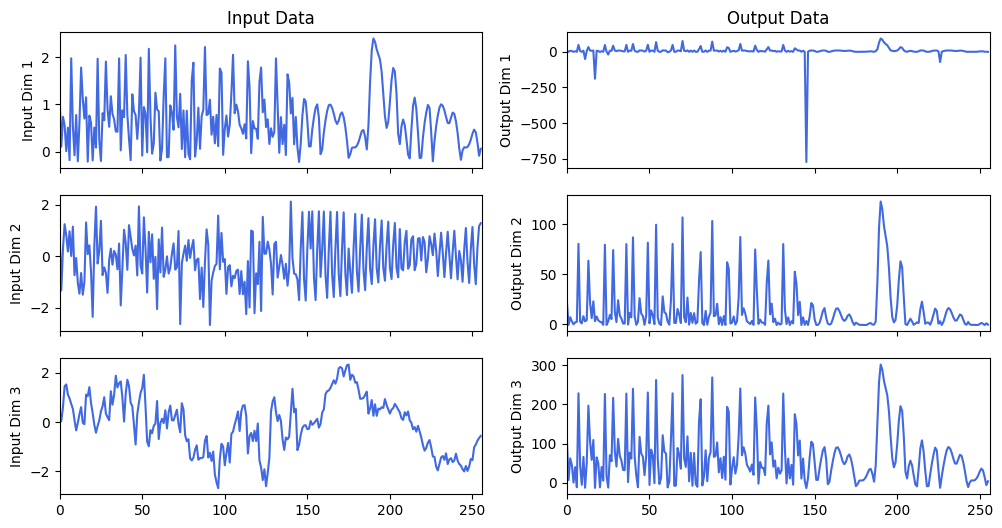

In [8]:
# Try to generate the 3-channels time series
trees, x, y = generator.run(rng, input_dimension=3, output_dimension=3, n_points=256)
print(trees)
fig = plot_series(x, y)

In [6]:
fig.savefig("../images/ID3_OD3.jpg", dpi=300, bbox_inches="tight")